# (1) [Exercise] Obtaining expectation value of a Hamiltonian.

Consider the following Hamiltonian

$$
K = \frac{1}{3} \sum_{i<j} X_i X_j - \sum_{i=0}^{n-1} Z_i,
$$

where $n$ is the number of qubits (or wires, in Pennylane language), $X_i$ and $Z_i$ are the Pauli-X and Pauli-Z operators acting on the $i$-th qubit, respectively, and $\sum_{i<j}$ denotes a sum over all pairs $(i, j)$ where $i < j$. For example, for $n = 3$, the pairs that contribute to the sum over $i < j$ are (0,1), (1,2) and (0,2). Note that indexing starts from 0.

You must implement in Pennylane a function that simulates a quantum circuit where the qubits start in the state $\vert 0 \rangle$ and a Hadamard gate $H$ is applied to all of them, producing a final state $\vert \psi \rangle$.

The function must receive the number of qubits and return the expectation value of $K$ for $\vert \psi \rangle$.

## Solution:

For this problem, the first step is to install and import the necesary libraries:

In [8]:
!pip install pennylane
!pip install matplotlib
!pip install numpy

In [2]:
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt
import numpy as np

The Hamiltonian that we want to implement is the following:

\begin{equation}
    K = \dfrac{1}{3} \sum_{i<j} X_i X_j - \sum_0^{n-1} Z_i
\end{equation}



In [3]:

def Expectation_Value(n_qubits):

    #First we generate the first term of the hamiltonian, X_i X_j
    term_1 = 0
    for i in range(n_qubits-1):
        for j in range(i+1, n_qubits):
            term_1 += qml.PauliX(i) @ qml.PauliX(j)

    #Then the Second term of the hamiltonian, Z_i
    term_2 = 0
    for i in range(n_qubits):
        term_2 += qml.PauliZ(i)


    # Now we generate the Hamiltonian
    H = 1 / 3 * term_1 - term_2

    # Creating the device
    # Here it can be the default.qubit, but for more spice we utilize the lightning.qubits
    # to simulate up to 21 qubits in a matter of seconds
    dev = qml.device("lightning.qubit", wires=n_qubits)


    #Now we will generate the initial state of |+>^n, obtainted
    # By applying the H gate to all the qubits
    @qml.qnode(dev)
    def hadamard_state(Op):
        for i in range(n_qubits):
            qml.Hadamard(wires=i)

        return qml.expval(Op)
    

    # We return now the expected value of the H operator 
    # w.r.w. the |+>^n State
    return hadamard_state(H)


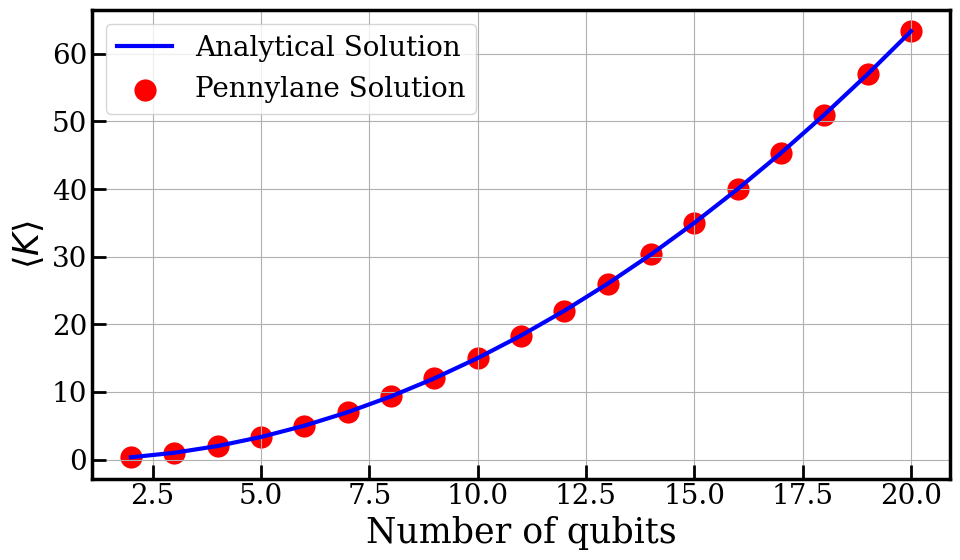

In [5]:

#for this example, we will compute the Exp value of
#the hamiltonian up to a 20 site-chain
n_max_qubits = 20

#We generate the lists in which we will be saving the information
N_QUBITS = [i for i in range(2,n_max_qubits+1)]
EXP_VAL = []

#We compute this for different num_qubits
for n_qubits in N_QUBITS:
    EXP_VAL.append(float(Expectation_Value(n_qubits)))



# Update matplotlib settings
plt.rcParams.update({
    "text.usetex": False,  # Disable LaTeX rendering
    "font.family": "serif",  # Use serif font
    "font.sans-serif": "Helvetica",  # Use Helvetica sans-serif font
    "font.size": 20  # Set font size for all text in the plot
})

# Define figure size and DPI
dpi = 100
fig, ax = plt.subplots(figsize=(10, 6), dpi=dpi)  # Increase figure size for better readability

xlabel = r'Number of qubits'
ax.set_xlabel(xlabel, fontsize=25)
ylabel = r'$ \langle K \rangle $'
ax.set_ylabel(ylabel, fontsize=25)

# Increase the size of tick labels
ax.tick_params(axis='both', which='major', length=10, width=2, labelsize=20, direction='in', color='black')
ax.tick_params(axis='both', which='minor', length=5, width=1, labelsize=16, direction='in', color='black')

# Set spine widths (only need to set them once)
for axis in ['bottom', 'left', 'top', 'right']:
    ax.spines[axis].set_linewidth(2.5)

# Analytical solution (vectorized for array input)
def analytical_sol(n_qubits):
    return n_qubits * (n_qubits - 1) / 6

# Plot analytical solution
ax.plot(N_QUBITS, analytical_sol(np.array(N_QUBITS)), lw=3, label='Analytical Solution', color='blue')
ax.grid(True)

# Plot Pennylane solution
ax.scatter(N_QUBITS, EXP_VAL, lw=10, color='red', label='Pennylane Solution')

# Show legend
plt.legend(fontsize=20)

# Adjust layout to avoid clipping of labels
plt.tight_layout()

# Save the figure as an SVG file (vector format)
plt.savefig('problem1.svg', format='svg')

# Show the plot (optional, if you want to visualize it immediately)
plt.show()